# PART 2: Cleansing

# OUTLIERS

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [118]:
# Read data

df = pd.read_csv("FlFile_SarahKa.csv")
df.head()

,movie_id,budget,original_language,popularity,release_date,runtime,revenue,Top_100_popular_movies,Long_movie_title,Standard_movie_title,Short_movie_title,Highest_budget_movie,movie_with_popular_actors,Big_released_year,Big_released_month,Big_released_day,genre_adventure,genre_fantasy,genre_animation,genre_drama,genre_horror,genre_action,genre_comedy,genre_history,genre_western,genre_thriller,genre_crime,genre_western.1,genre_documentary,genre_science_fiction,genre_mystery,genre_music,genre_romance,genre_family,genre_war,genre_foreign,Widespread_genre,Multiple_genres,High_female_actor_number,High_male_actor_number,Low_female_actor_num,Low_male_actor_num,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects,Best_producers_movie,released_during_winter,released_during_summer,released_Sept,released_Oct,released_Nov,released_Dec,released_Jan,released_Feb,released_Mar,released_Apr,released_May,released_June,released_July,released_Aug,released_during_Top_month,released_during_war,released_after_TV_invention,released_after_flat_screen,Release_during_weekday,Release_during_weekend,Unknown_run_time,Short_run_time,Average_run_time,Long_run_time,Eng_original_language,web_presence,Have_poster,Have_tagline
0,453,0,en,1.694250,26/09/2014,116.0,1009620,0,0,0,1,0,0.0,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0
1,454,5000000,en,6.546551,11/09/1992,93.0,12534961,0,1,0,0,0,0.0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1
2,455,0,en,0.656215,23/09/1988,101.0,3790493,0,0,1,0,0,0.0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0
3,456,0,en,9.128571,16/08/2007,84.0,4910682,0,0,0,1,0,0.0,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,0.0,NaN,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0
4,457,1288000,en,8.590813,12/04/1940,130.0,6000000,0,0,0,1,0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1


In [119]:
# Create new dataframe including only variables with outliers

# We will find the columns to remove by counting unique values. If the column have only 2 unique values
# (1 & 2) then we can remove it




# No of unique values in each column
n = df.nunique(axis=0)
  
#print("No.of.unique values in each column :\n", n)


#df_with_outliers
df_with_outliers = df.loc[:, (df.nunique(axis=0) != 2)]

df_with_outliers



,movie_id,budget,original_language,popularity,release_date,runtime,revenue,genre_science_fiction,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects
0,453,0,en,1.694250,26/09/2014,116.0,1009620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,454,5000000,en,6.546551,11/09/1992,93.0,12534961,0.0,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0
2,455,0,en,0.656215,23/09/1988,101.0,3790493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,0,en,9.128571,16/08/2007,84.0,4910682,0.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,457,1288000,en,8.590813,12/04/1940,130.0,6000000,0.0,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2990,0,en,0.851599,11/05/2001,75.0,100202,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2996,2991,0,en,1.560980,28/03/1997,90.0,7240837,0.0,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,0.0
2997,2992,13000000,en,4.794088,12/01/2001,112.0,91038276,0.0,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2998,2993,1135654,en,3.878515,18/03/1924,149.0,1213880,0.0,3.0,2.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,1.0


The genre_science fiction column should have been removed (1 & 0 values).
Let's see why it's here yet and remove it


In [120]:
#pd.set_option("display.max_rows", None)
#df.loc[:,"genre_science_fiction"]

# show unique values in this specific column
df['genre_science_fiction'].unique()




array([ 0.,  1., nan,  2.])

In [122]:
# Replace '2' value by Nan in genre_science_fiction and remove the column from our new dataframe

pd.options.mode.chained_assignment = None
df_with_outliers['genre_science_fiction'] = df_with_outliers['genre_science_fiction'].replace('2', np.nan)




# Re-Create dataframe including only variables with outliers

# No of unique values in each column
n = df.nunique(axis=0)
  
# print("No.of.unique values in each column :\n", n)

# df_with_outliers (tacking in consideration NULL values)
df_with_outliers = df.loc[:, (df.nunique(axis=0) != 2) & (df.nunique(axis=0) != 3)]


df_with_outliers



,movie_id,budget,original_language,popularity,release_date,runtime,revenue,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects
0,453,0,en,1.694250,26/09/2014,116.0,1009620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,454,5000000,en,6.546551,11/09/1992,93.0,12534961,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0
2,455,0,en,0.656215,23/09/1988,101.0,3790493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,0,en,9.128571,16/08/2007,84.0,4910682,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,457,1288000,en,8.590813,12/04/1940,130.0,6000000,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2990,0,en,0.851599,11/05/2001,75.0,100202,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2996,2991,0,en,1.560980,28/03/1997,90.0,7240837,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,0.0
2997,2992,13000000,en,4.794088,12/01/2001,112.0,91038276,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2998,2993,1135654,en,3.878515,18/03/1924,149.0,1213880,3.0,2.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,1.0


In [130]:
# Create dataframe without outliers using IQR
# IQR-outliers = Median ± ((Q3-Q1) * 1.5)

from scipy.stats import iqr

def IQRoutlier(x):
    xmid = np.median(x)
    #q1,q3 = iqr(x)
    q1,q3 = np.quantile(x,[0.25,0.75])
    out = (q3 - q1) * 1.5
    out1 = xmid - out
    out2 = xmid + out
    if (out1 < min(x)):
        out1 = min(x)
    if (out2 > max(x)):
        out2 = max(x)
    return([out1, out2])

def IQRoutliers(values):
    q = iqr(values,axis=0,nan_policy='omit')
    min = np.median(values)
    return [IQRoutlier(x) for x in values]


def get_df_without_outliers(df, threshold=1.5):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    no_outliers_df = numeric_df[(numeric_df >= (Q1 - 1.5 * IQR)) & (numeric_df <= (Q3 + 1.5 * IQR))]
    return no_outliers_df

df_without_outliers = get_df_without_outliers(df_with_outliers, 1.5)
df_without_outliers

,movie_id,budget,popularity,runtime,revenue,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects
0,453,0.0,1.694250,116.0,1009620.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,454,5000000.0,6.546551,93.0,12534961.0,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0
2,455,0.0,0.656215,101.0,3790493.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,0.0,9.128571,84.0,4910682.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,457,1288000.0,8.590813,130.0,6000000.0,3.0,1.0,4.0,2.0,NaN,0.0,5.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2990,0.0,0.851599,75.0,100202.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2996,2991,0.0,1.560980,90.0,7240837.0,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0
2997,2992,13000000.0,4.794088,112.0,91038276.0,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2998,2993,1135654.0,3.878515,149.0,1213880.0,3.0,2.0,3.0,1.0,3.0,NaN,4.0,3.0,3.0,NaN


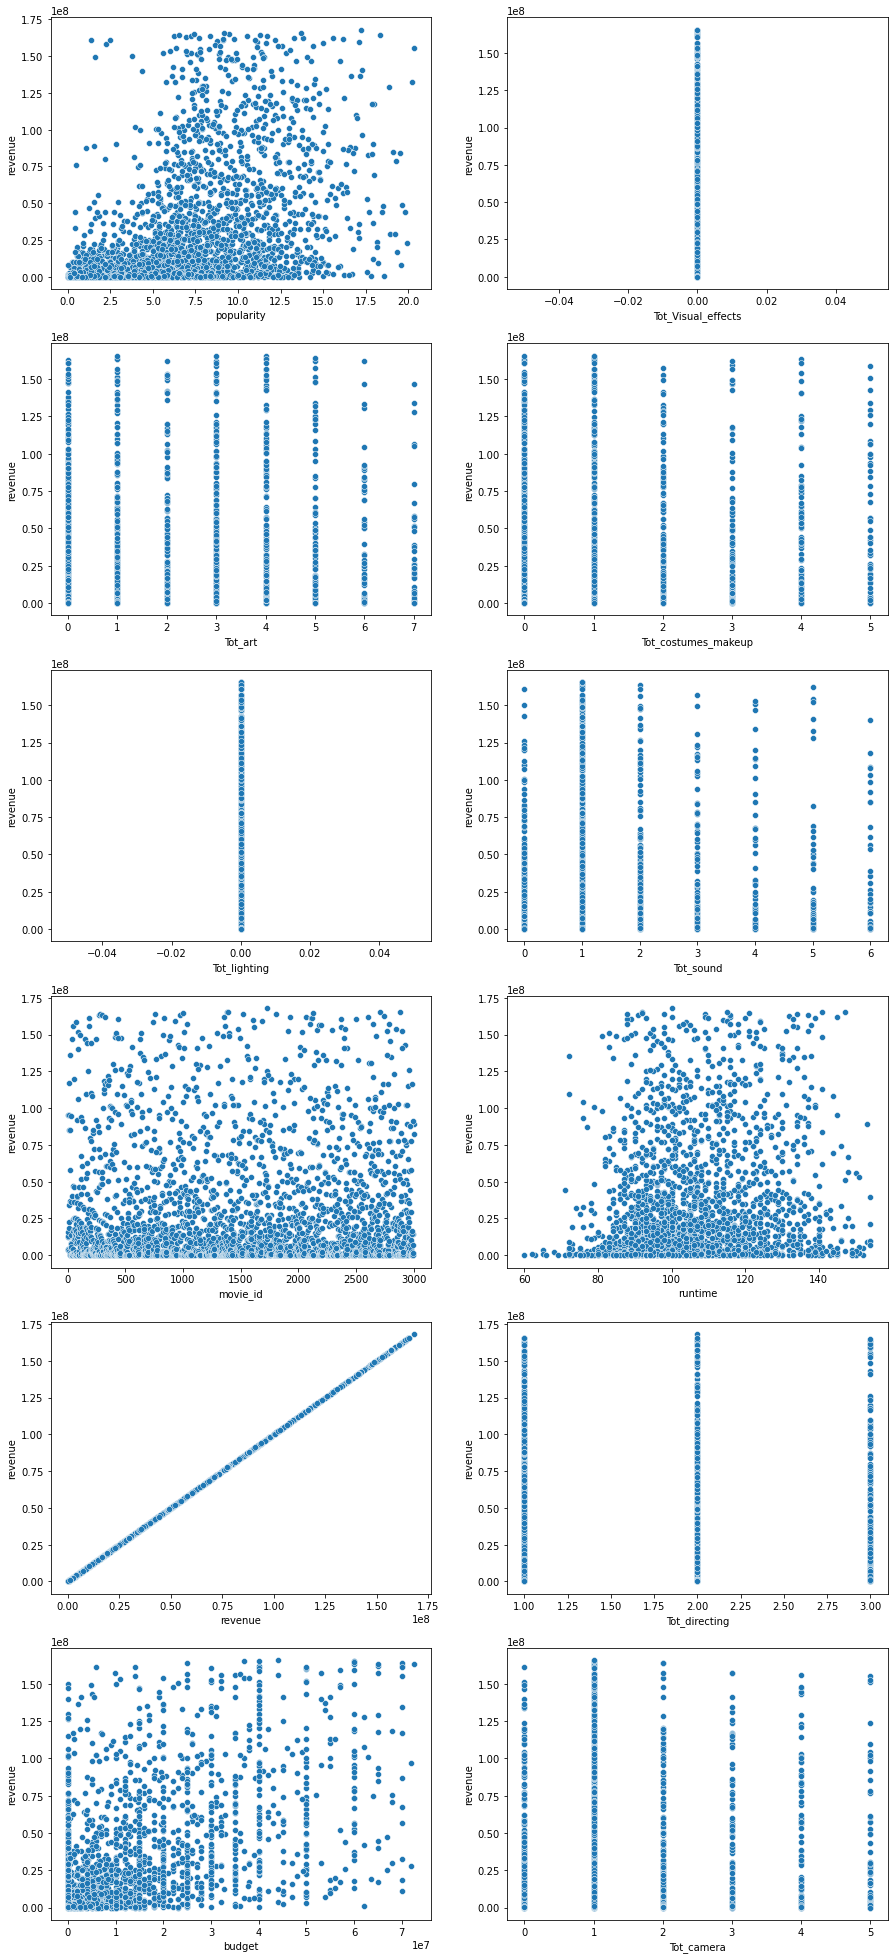

In [134]:
# Now we can check the removal of outliers by reproducing previous graphs

categorical = ['original_language','release_date']
numerical = ['popularity', 'Tot_Visual_effects', 'Tot_art', 'Tot_costumes_makeup', 'Tot_lighting', 'Tot_sound', 
             'movie_id', 'runtime', 'revenue', 'Tot_directing', 'budget', 'Tot_camera', 'Tot_Editing', 
             'Tot_writing', 'Tot_Production']

fig, ax = plt.subplots(6, 2, figsize=(15, 35))
for var, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=var, y='revenue', data=df_without_outliers, ax=subplot)

OUTLIERS REMOVAL

Now we will check the distribution with and without outliers.
We will use Kolmogorov-Smirnov test (stats.ks) for continuous variables,
(and Chi-square for categorical variables)

Then we will check the correlation using Spearman for two non-normally distributed variable.
We will get P-value and Fisher's z. 
If P-val < 0.05 there is a difference in the distribution with and without outliers.

At the end, if we find a change in the outcome distribution but the correlation stay unchanged
we can erase the outlier.

In [135]:
from scipy import stats
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

In [138]:
def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')
        

def OutliersRemoveDecisions(df, y_label, threshold=1.5, significant_level=0.05):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]
    
    with_outliers_df = numeric_df
    without_outliers_df = get_df_without_outliers(numeric_df, threshold)
        
    distribution_change_df = []

    for name in numeric_columns_names:
        with_outliers_series = with_outliers_df[name]
        without_outliers_series = without_outliers_df[name]
    
        ks_result = stats.ks_2samp(with_outliers_series, without_outliers_series)
        
        x_outliers = with_outliers_series
        x_no_outliers = without_outliers_series
        
        xy = x_outliers.corr(y_label, method='spearman')
        ab = x_no_outliers.corr(y_label, method='spearman')
                
        n = x_outliers.shape[0]
        n2 = x_no_outliers.shape[0]
        
        ftz_result = independent_corr(xy, ab, n, n2, method='fisher')
        totout = np.sum(with_outliers_series.count()) - np.sum(without_outliers_series.count())
        
        
        distribution_change_df.append(
            {
                'variable' : name,
                'outliers_number': '{} ({})'.format(totout, np.round(totout*100/n,2)),
                'distribution_change': '+' if ks_result[1] < significant_level else '-', #  ks_result[1] -> gives us the p-value
                'correlation_changed': '+' if ftz_result[1] < significant_level else '-', #  ftz_result[1] -> gives us the p-value
                'drop': 'no' if ((ks_result[1] < significant_level) & (ftz_result[1] < significant_level)) else 'yes' 
            }
        )
    
    return pd.DataFrame(distribution_change_df)

In [143]:
df_with_outliers.iloc[:,1:]

,budget,original_language,popularity,release_date,runtime,revenue,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects
0,0,en,1.694250,26/09/2014,116.0,1009620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5000000,en,6.546551,11/09/1992,93.0,12534961,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0
2,0,en,0.656215,23/09/1988,101.0,3790493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,en,9.128571,16/08/2007,84.0,4910682,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,1288000,en,8.590813,12/04/1940,130.0,6000000,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,en,0.851599,11/05/2001,75.0,100202,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2996,0,en,1.560980,28/03/1997,90.0,7240837,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,0.0
2997,13000000,en,4.794088,12/01/2001,112.0,91038276,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2998,1135654,en,3.878515,18/03/1924,149.0,1213880,3.0,2.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,1.0


In [158]:
OutliersRemoveDecisions(df_with_outliers.iloc[:,1:], df_with_outliers.revenue)

C:\Users\sarah\AppData\Local\Temp\ipykernel_12112\527938394.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,variable,outliers_number,distribution_change,correlation_changed,drop
0,budget,249 (8.3),+,+,no
1,popularity,7 (0.23),-,-,yes
2,runtime,26 (0.87),-,-,yes
3,revenue,244 (8.13),+,+,no
4,Tot_directing,0 (0.0),-,-,yes
5,Tot_Production,50 (1.67),-,-,yes
6,Tot_camera,277 (9.23),+,+,no
7,Tot_Editing,0 (0.0),-,-,yes
8,Tot_sound,531 (17.7),+,+,no
9,Tot_lighting,0 (0.0),-,-,yes


So we have to erase the outliers of variables: popularity, runtime, revenue
since the others variables are categorical

In [163]:
# New dataset definition - after outliers removal

# use dataframe with outliers 
# then replace by columns from dataset without outliers
df_after_outliers_removal = df_with_outliers


df_after_outliers_removal['popularity'] = df_without_outliers['popularity']
df_after_outliers_removal['runtime'] = df_without_outliers['runtime']
df_after_outliers_removal['revenue'] = df_without_outliers['revenue']



In [164]:
df_after_outliers_removal.iloc[:,1:]

,budget,original_language,popularity,release_date,runtime,revenue,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects,Tot_Visual_effects
0,0,en,1.694250,26/09/2014,116.0,1009620.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5000000,en,6.546551,11/09/1992,93.0,12534961.0,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0
2,0,en,0.656215,23/09/1988,101.0,3790493.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,en,9.128571,16/08/2007,84.0,4910682.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1288000,en,8.590813,12/04/1940,130.0,6000000.0,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,en,0.851599,11/05/2001,75.0,100202.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2996,0,en,1.560980,28/03/1997,90.0,7240837.0,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,0.0,0.0
2997,13000000,en,4.794088,12/01/2001,112.0,91038276.0,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0
2998,1135654,en,3.878515,18/03/1924,149.0,1213880.0,3.0,2.0,3.0,1.0,3.0,NaN,4.0,3.0,3.0,1.0,NaN


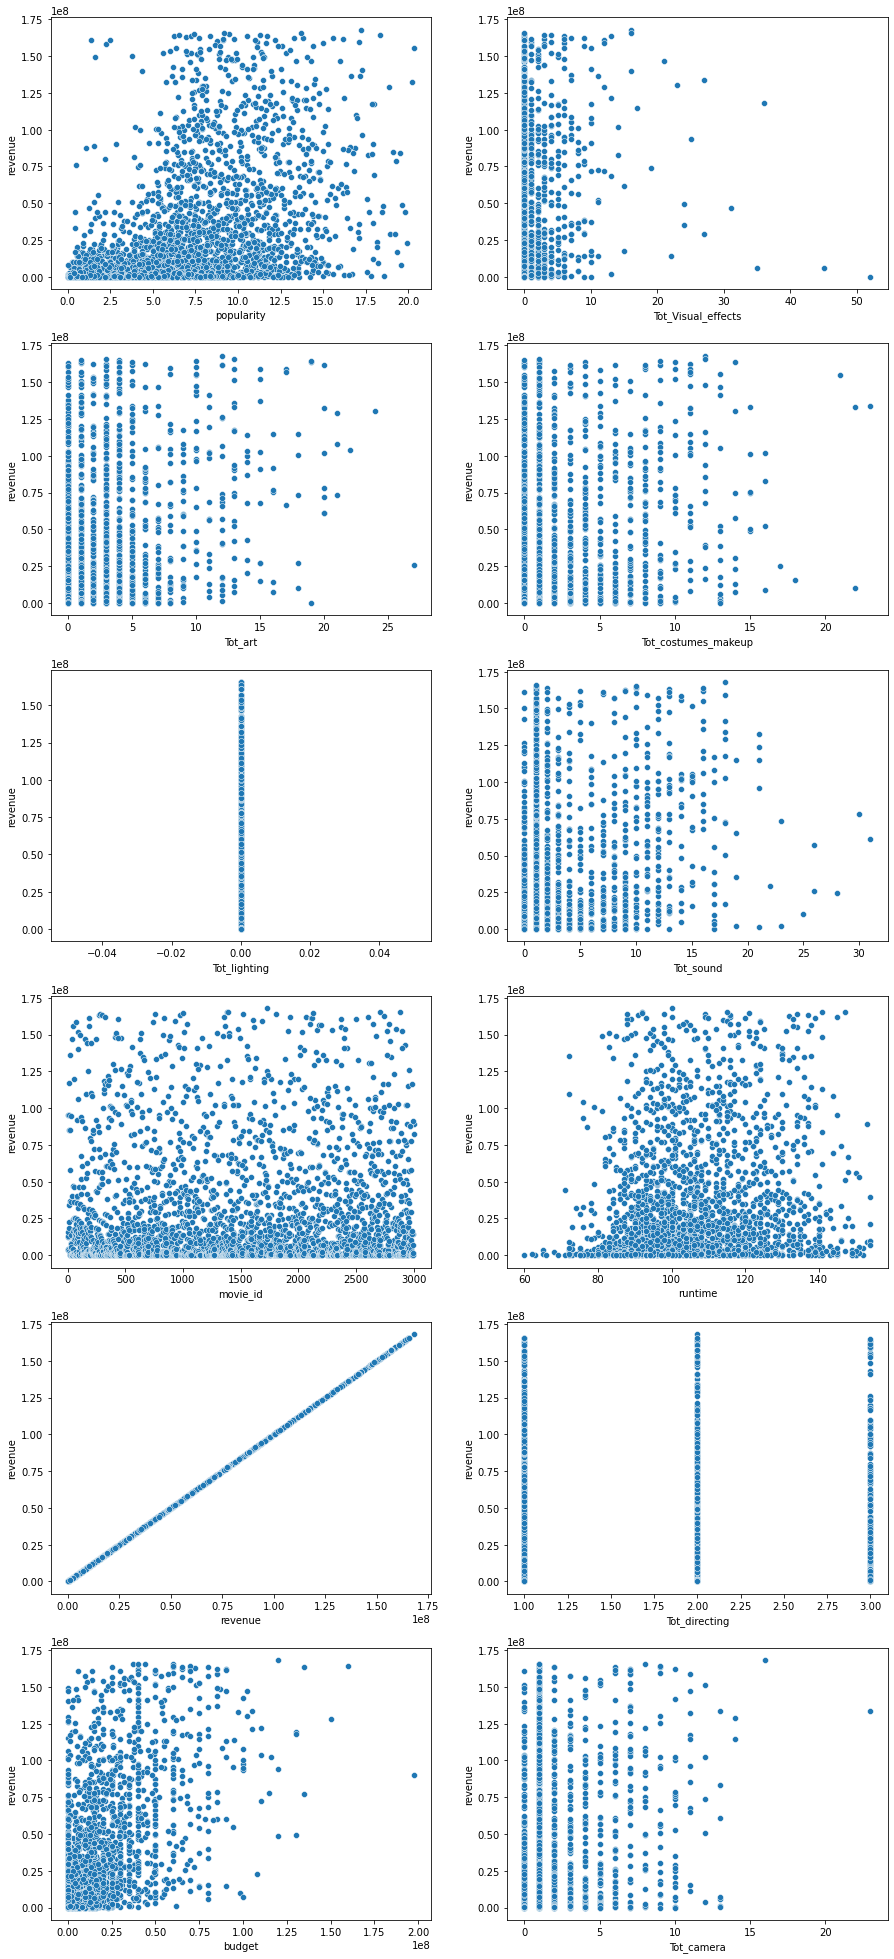

In [165]:
# We can see the difference in scatterplots before and after outliers removal

fig, ax = plt.subplots(6, 2, figsize=(15, 35))
for var, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=var, y='revenue', data=df_with_outliers, ax=subplot)

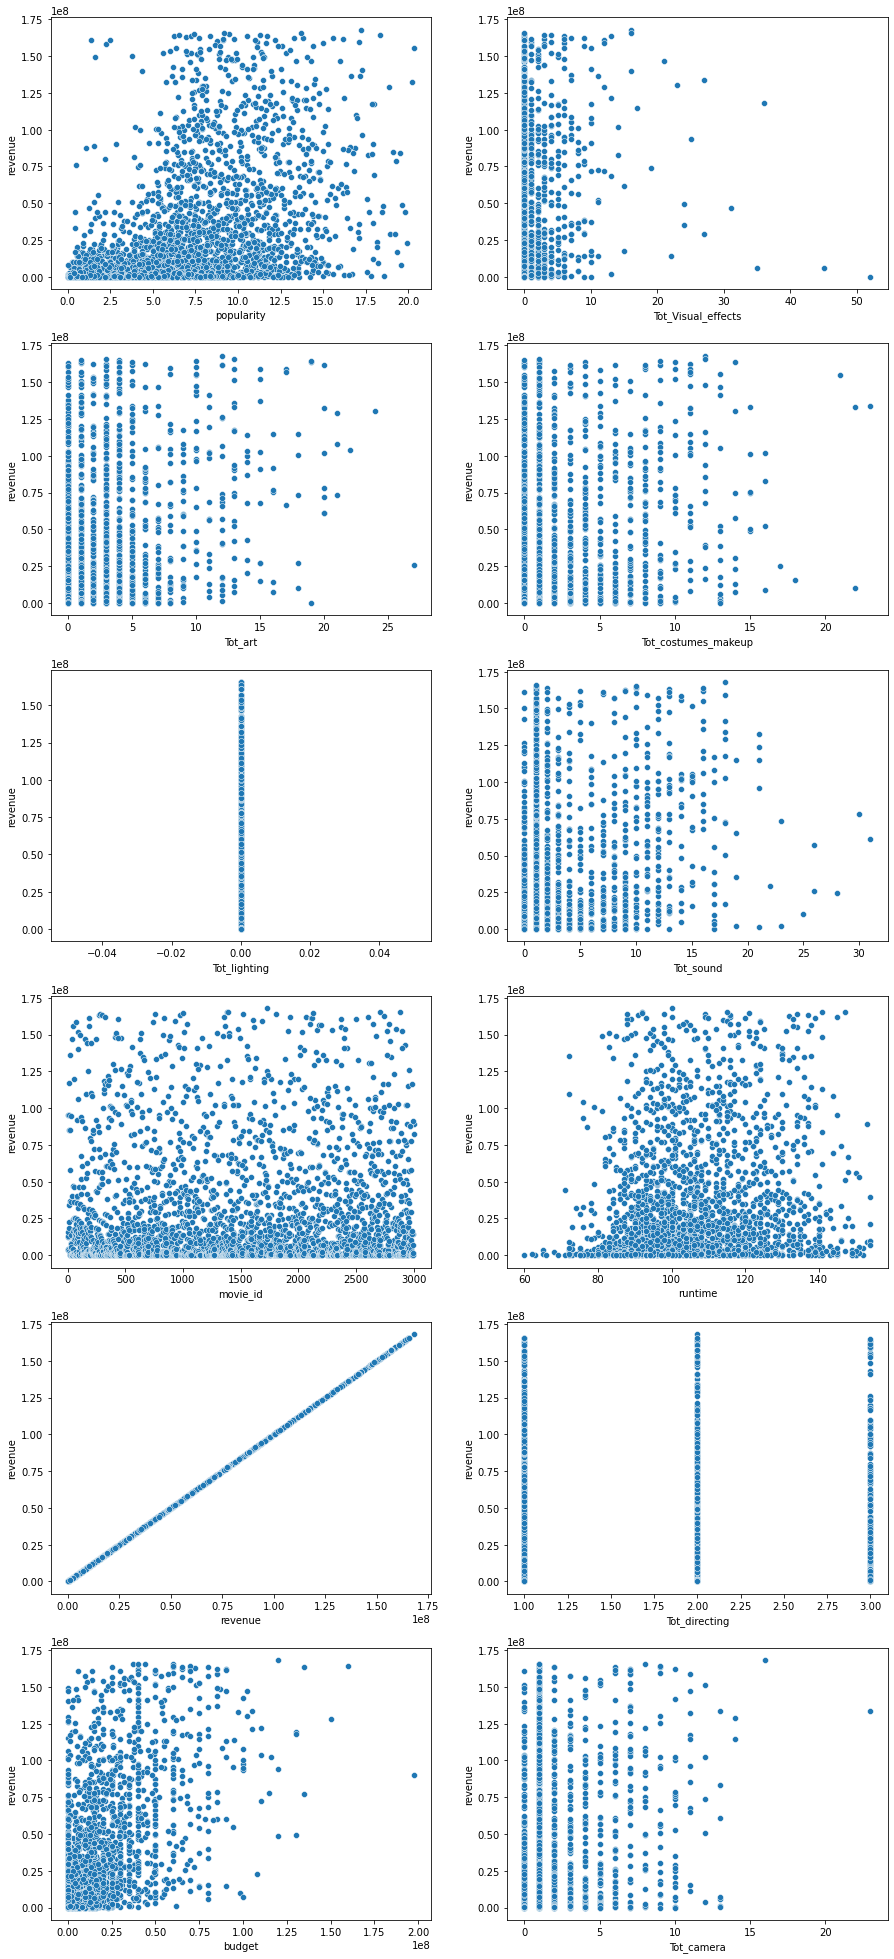

In [166]:
fig, ax = plt.subplots(6, 2, figsize=(15, 35))
for var, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=var, y='revenue', data=df_after_outliers_removal, ax=subplot)

# MISSING VALUES

We already found 38 columns with missing values and their quantity and percentage.


<AxesSubplot:>

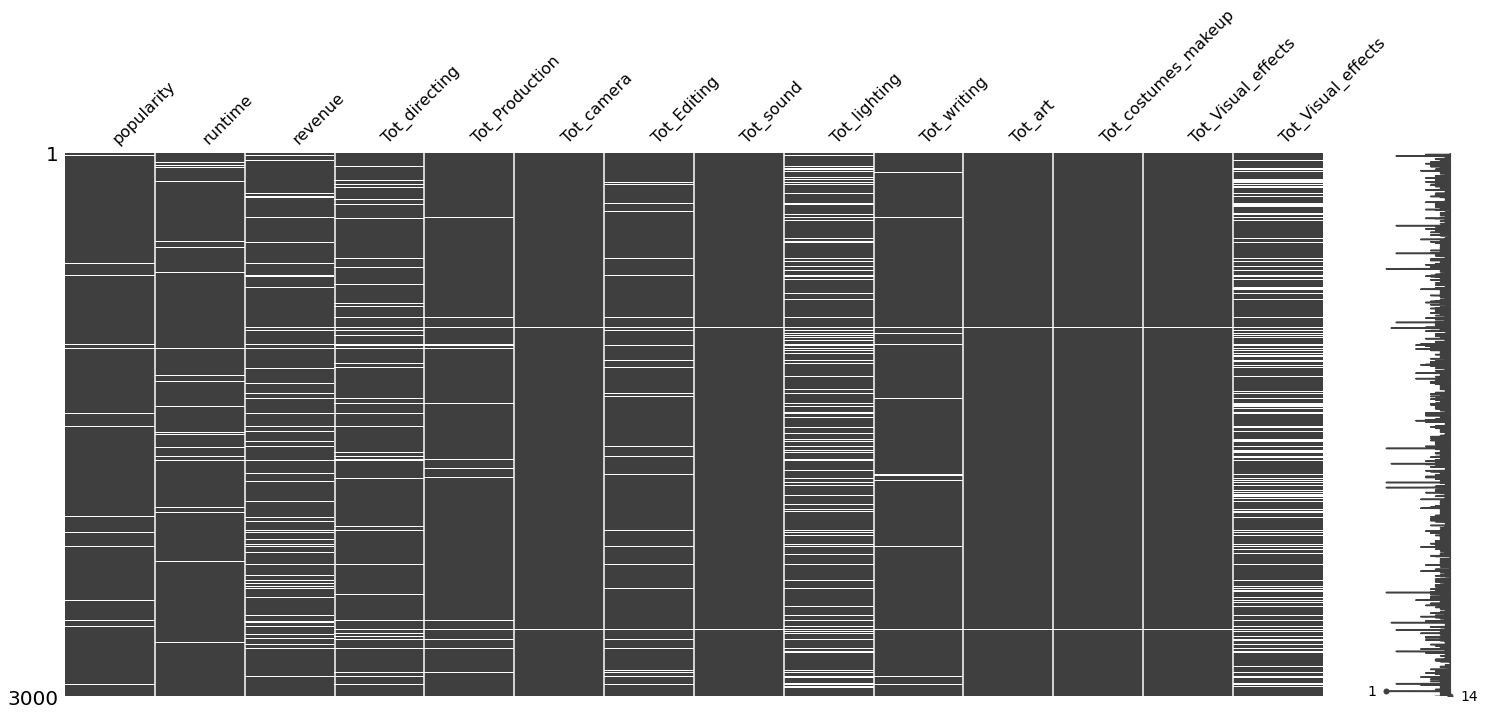

In [173]:
# We will use our new dataframe after outliers removal:

ndf=df_after_outliers_removal

### missingness (nullity) matrix
missingdata_df = ndf.columns[ndf.isnull().any()].tolist()
msno.matrix(ndf[missingdata_df])

In [178]:
# From the previous part:

# Overview of variables with missing values quantity and percentage 

def missing_values_summary(df):
    
    variable_na = df.isnull().sum()
    variable_na_percent = 100 * df.isnull().sum() / len(df)
    variable_na_table = pd.concat([variable_na, variable_na_percent], axis=1)
    variable_na_table_ren_columns = variable_na_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    variable_na_table_ren_columns = variable_na_table_ren_columns[
        variable_na_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    print ("Total " + str(variable_na_table_ren_columns.shape[0])+ " columns with missing values." )
    
    return variable_na_table_ren_columns

missing_values_summary(df)

Total 38 columns with missing values.


,Missing Values,% of Total Values
Best_producers_movie,592,19.7
High_male_actor_number,365,12.2
Low_male_actor_num,365,12.2
High_female_actor_number,237,7.9
Low_female_actor_num,237,7.9
movie_with_popular_actors,26,0.9
Tot_directing,16,0.5
Tot_Production,16,0.5
Tot_camera,16,0.5
Tot_Editing,16,0.5


Density Plots 

In [189]:
df_na = df[df.columns[df.isna().any()]]    
df_na      

,runtime,movie_with_popular_actors,genre_adventure,genre_fantasy,genre_animation,genre_drama,genre_horror,genre_action,genre_comedy,genre_history,genre_western,genre_thriller,genre_crime,genre_western.1,genre_documentary,genre_science_fiction,genre_mystery,genre_music,genre_romance,genre_family,genre_war,genre_foreign,Multiple_genres,High_female_actor_number,High_male_actor_number,Low_female_actor_num,Low_male_actor_num,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects,Best_producers_movie
0,116.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,0.0
2,101.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,84.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,130.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2.0,11.0,0.0,5.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN
2996,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,0.0,1.0,2.0,6.0,0.0,NaN
2997,112.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,8.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0,NaN
2998,149.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,2.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,1.0,NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


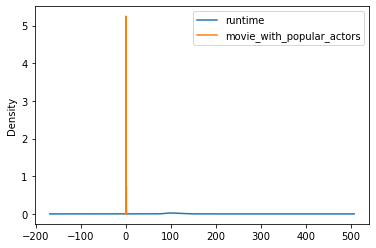

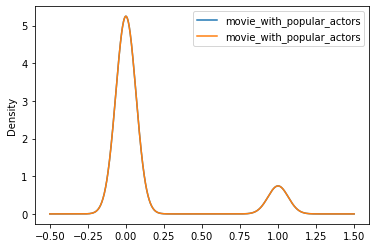

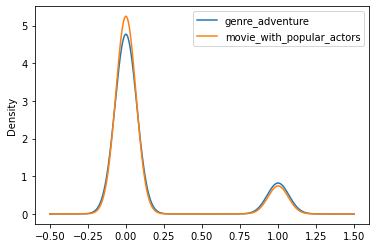

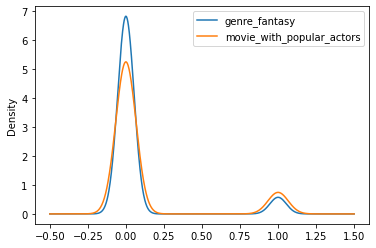

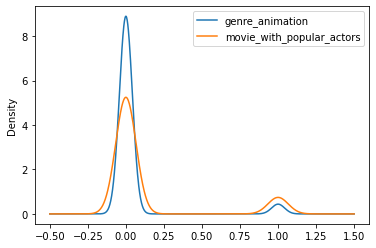

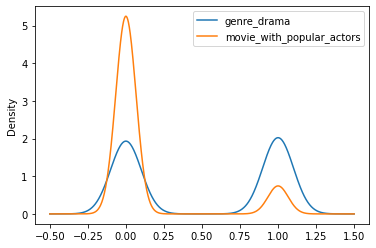

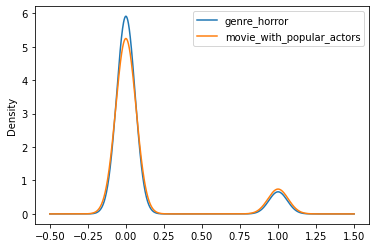

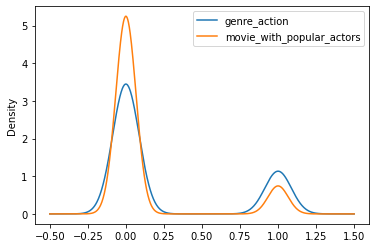

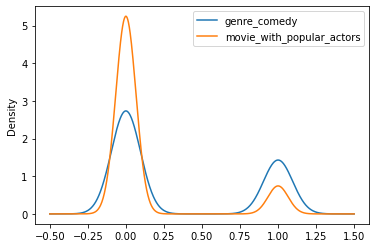

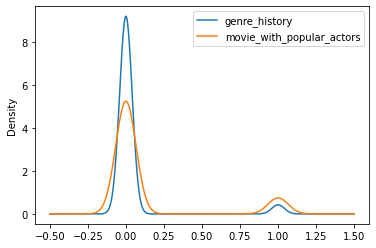

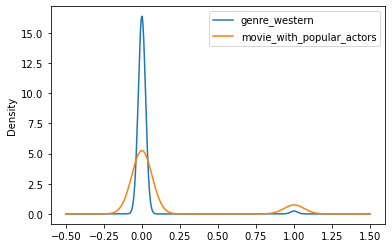

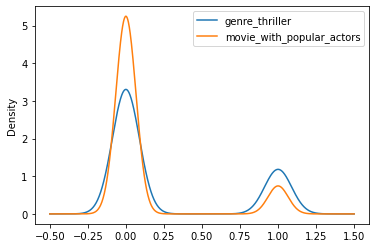

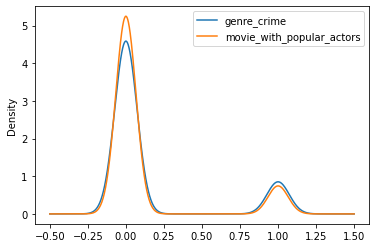

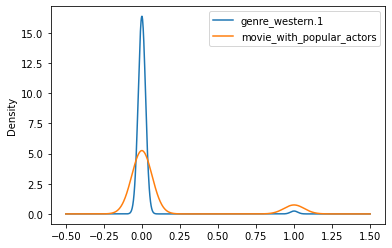

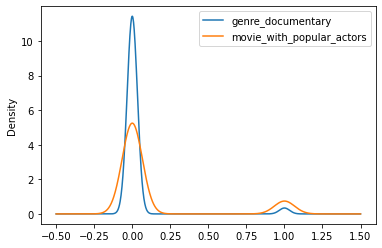

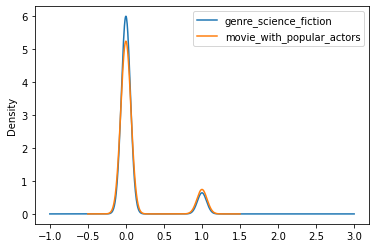

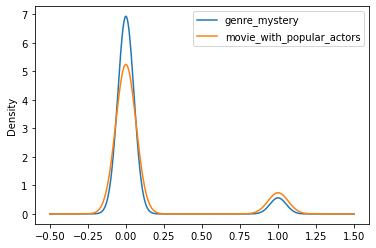

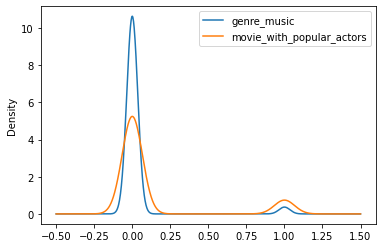

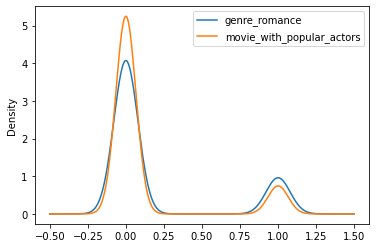

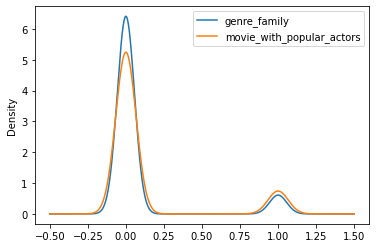

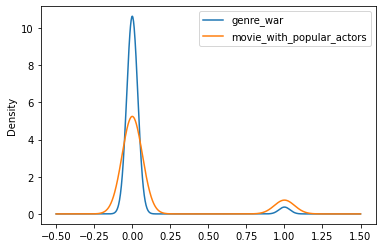

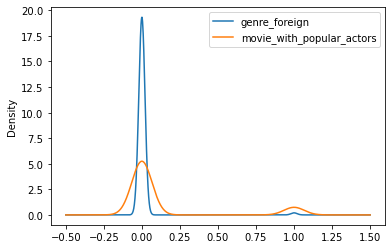

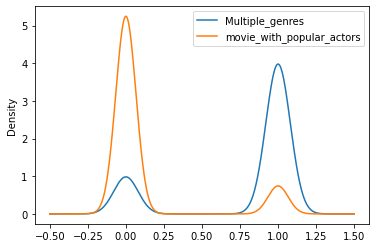

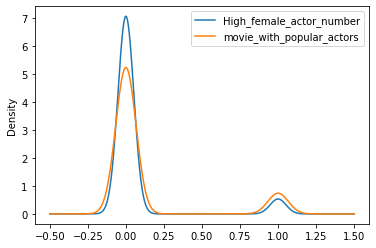

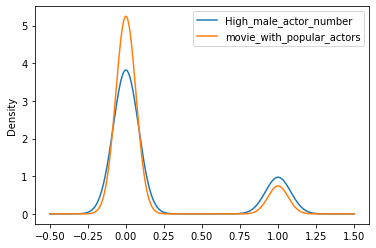

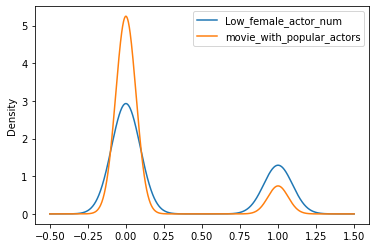

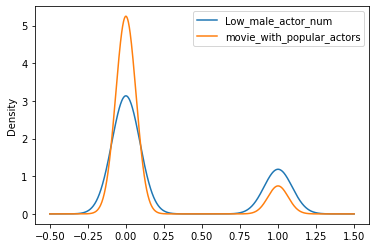

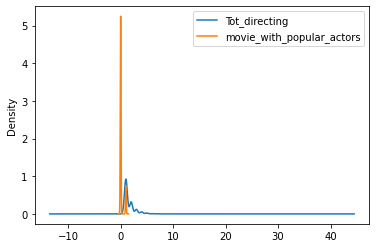

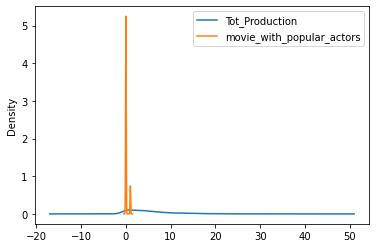

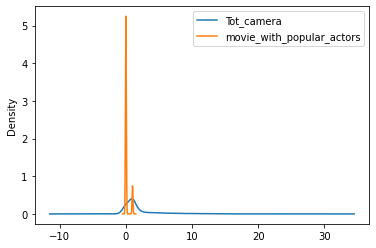

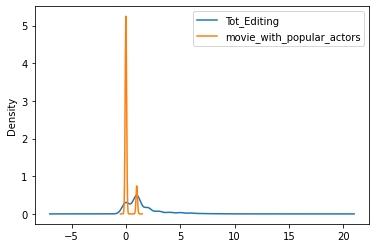

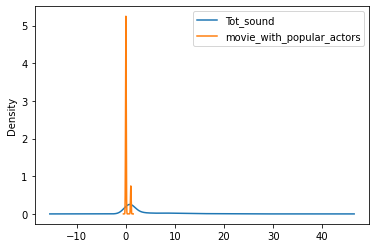

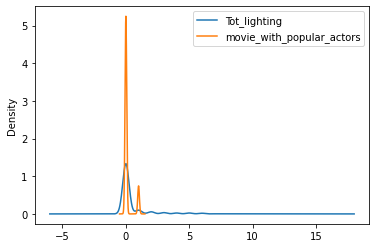

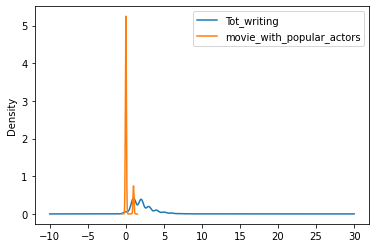

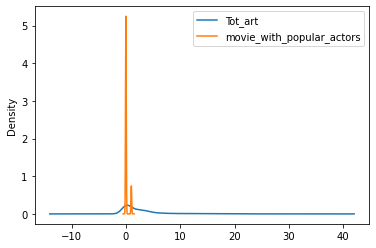

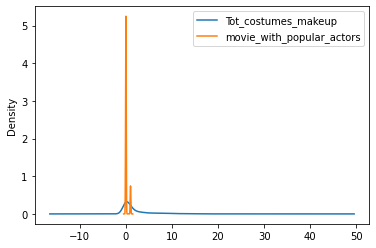

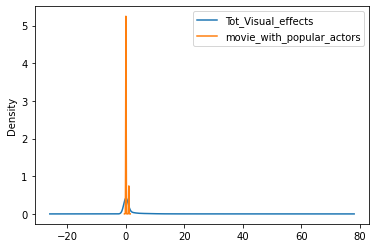

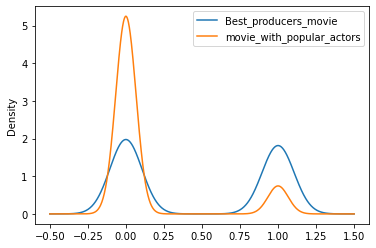

In [194]:
# Density graph for all the 38 "with_na" variables with all the others variables:

# for name in df_na.columns:
#    for name2 in df.columns:
#        df[[name, name2]].plot.kde()

# We can take one variable for example (long running time):
name2="movie_with_popular_actors"
for name in df_na.columns:
#    for name2 in df_na.columns:
        df[[name, name2]].plot.kde()
    




Missing Matrix and Mechanism


In [200]:
def get_missings_matrix(df):
    missings_matrix_df = df.isna()
    for name in df.columns:
        missings_matrix_df.loc[(missings_matrix_df[name] == True), name] = 1
        missings_matrix_df.loc[(missings_matrix_df[name] == False), name] = 0
    return missings_matrix_df

def MissingMechanism(df, significant_level=0.05):
    missing_matt = get_missings_matrix(df)
    numeric_columns_names = df.select_dtypes("number").columns
    distribution_change_df = {} #pd.DataFrame()
    i = 0
    for numeric_missing_column_name in numeric_columns_names: # -> only numeric variables that have missing values    
            df_without_na = df[missing_matt[numeric_missing_column_name] == 0]
            for numeric_column_name in numeric_columns_names: # -> all numeric variables in data: with and without missing values
                if numeric_missing_column_name != numeric_column_name:
                    series_with_na = df[numeric_column_name]
                    series_without_na = df_without_na[numeric_column_name]
                    ks_result = stats.ks_2samp(series_with_na, series_without_na)
                    #distribution_change_df.append(
                    distribution_change_df[i] = dict(    
                        {
                            'var_1_missing' : numeric_missing_column_name,
                            'var_2': numeric_column_name,
                            'missings_number': sum(missing_matt[numeric_missing_column_name]), #len(df[numeric_missing_column_name]) - len(df[numeric_column_name]), 
                            'distribution_changed': '+' if ks_result[1] < significant_level else '-', #  ftz_result[1] -> gives us the p-value
                            'imputation': 'no' if (ks_result[1] < significant_level) else 'yes'
                        })
                    #print(i)
                    i = i + 1
            
    return pd.DataFrame(distribution_change_df).transpose()


get_missings_matrix(ndf)


,movie_id,budget,original_language,popularity,release_date,runtime,revenue,Tot_directing,Tot_Production,Tot_camera,Tot_Editing,Tot_sound,Tot_lighting,Tot_writing,Tot_art,Tot_costumes_makeup,Tot_Visual_effects,Tot_Visual_effects
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [202]:
miss=MissingMechanism(ndf, 0.05)
miss

,var_1_missing,var_2,missings_number,distribution_changed,imputation
0,movie_id,budget,0,-,yes
1,movie_id,popularity,0,-,yes
2,movie_id,runtime,0,-,yes
3,movie_id,revenue,0,-,yes
4,movie_id,Tot_directing,0,-,yes
...,...,...,...,...,...
235,Tot_Visual_effects,Tot_lighting,714,+,no
236,Tot_Visual_effects,Tot_writing,714,+,no
237,Tot_Visual_effects,Tot_art,714,+,no
238,Tot_Visual_effects,Tot_costumes_makeup,714,+,no


Missing Values Imputation

In [206]:
miss[miss.imputation == 'no']

,var_1_missing,var_2,missings_number,distribution_changed,imputation
61,revenue,budget,315,+,no
62,revenue,popularity,315,+,no
65,revenue,Tot_Production,315,+,no
67,revenue,Tot_Editing,315,+,no
71,revenue,Tot_art,315,+,no
73,revenue,Tot_Visual_effects,315,+,no
74,revenue,Tot_Visual_effects,315,+,no
80,Tot_directing,Tot_Production,216,+,no
81,Tot_directing,Tot_camera,216,+,no
82,Tot_directing,Tot_Editing,216,+,no


In [207]:
ndf2 = ndf.copy()

# drop rows with missing values
ndf2.dropna(inplace=True)

# summarize the number of rows and columns in the dataset
print(ndf2.shape)

(1921, 18)


We stay with 1921 rows from 3000 initially

In [208]:
# Dataframe before and after Nan rows removal
print(ndf.describe())
print("----------------------------------------------------------------------------------")
print(ndf2.describe())

          movie_id        budget   popularity      runtime       revenue  \
count  3000.000000  3.000000e+03  2930.000000  2872.000000  2.685000e+03   
mean   1500.500000  2.253133e+07     7.411179   105.916086  3.037773e+07   
std     866.169729  3.702609e+07     4.532805    16.328319  4.029542e+07   
min       1.000000  0.000000e+00     0.000001    60.000000  1.000000e+00   
25%     750.750000  0.000000e+00     3.918435    94.000000  1.723872e+06   
50%    1500.500000  8.000000e+06     7.206608   104.000000  1.199040e+07   
75%    2250.250000  2.900000e+07    10.543904   116.000000  4.270000e+07   
max    3000.000000  3.800000e+08    21.147960   154.000000  1.679776e+08   

       Tot_directing  Tot_Production   Tot_camera  Tot_Editing    Tot_sound  \
count    2784.000000     2900.000000  2984.000000  2853.000000  2984.000000   
mean        1.409124        4.830000     1.817694     1.251314     3.122989   
std         0.646450        4.413329     2.564019     1.215377     4.565531   

In [209]:
ndf.isna().sum()

movie_id                 0
budget                   0
original_language        0
popularity              70
release_date             0
runtime                128
revenue                315
Tot_directing          216
Tot_Production         100
Tot_camera              16
Tot_Editing            147
Tot_sound               16
Tot_lighting           508
Tot_writing             63
Tot_art                 16
Tot_costumes_makeup     16
Tot_Visual_effects      16
Tot_Visual_effects     714
dtype: int64

In [210]:
ndf2.isna().sum()

movie_id               0
budget                 0
original_language      0
popularity             0
release_date           0
runtime                0
revenue                0
Tot_directing          0
Tot_Production         0
Tot_camera             0
Tot_Editing            0
Tot_sound              0
Tot_lighting           0
Tot_writing            0
Tot_art                0
Tot_costumes_makeup    0
Tot_Visual_effects     0
Tot_Visual_effects     0
dtype: int64

In [212]:
# let's use the sklearn.impute.SimpleImputer 
# to replace NaN values with mean , median of the sample, or any other value

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_final = imp.fit_transform(ndf)



ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'en'

In [214]:

from sklearn.preprocessing import MinMaxScalerscaler = MinMaxScaler()

dfff = pd.DataFrame(scaler.fit_transform(ndf), columns = ndf.columns)
dfff.head()



from sklearn.impute import KNNImputerimputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(ndf),columns = ndf.columns)

SyntaxError: invalid syntax (1758027104.py, line 1)

In [215]:
# Export our cleaned dataframe to csv (to use it in Part 4)

df.to_csv(r'C:/Users/sarah/OneDrive/Documents/COURSES/BAR_ILAN_DATA_SCIENCE/EDA/HW_Data Analysis_EDA/HW_EDA_FINAL/FlFile_cleaned_SarahKa.csv', index=False)